In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import copy
import random

## Process Median Household Income Data
source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?src=bkmk

In [10]:
median_household_income= pd.read_csv("ACS_17_1YR_R1901.US01PRF_with_ann.csv")

In [11]:
median_household_income.head()

,Id,Id2,Geography,Target Geo Id,Target Geo Id2,Rank,Geographical Area,Dollar,Margin of Error
0,0100000US,NaN,United States,0100000US,NaN,NaN,United States,60336,86
1,0100000US,NaN,United States,0400000US11,11.0,1.0,District of Columbia,82372,2651
2,0100000US,NaN,United States,0400000US24,24.0,2.0,Maryland,80776,707
3,0100000US,NaN,United States,0400000US34,34.0,3.0,New Jersey,80088,672
4,0100000US,NaN,United States,0400000US15,15.0,4.0,Hawaii,77765,1795


In [12]:
median_household_income=median_household_income[["Rank","Geographical Area","Dollar"]]

In [14]:
median_household_income=median_household_income.drop(index=[0])

In [33]:
median_household_income=median_household_income.drop(index=[52])

In [34]:
median_household_income["Rank"]=median_household_income["Rank"].astype(int)

In [35]:
median_household_income

,Rank,Geographical Area,Dollar
1,1,District of Columbia,82372
2,2,Maryland,80776
3,3,New Jersey,80088
4,4,Hawaii,77765
5,5,Massachusetts,77385
6,6,Connecticut,74168
7,7,New Hampshire,73381
8,8,Alaska,73181
9,9,California,71805
10,10,Virginia,71535


In [36]:
state_abbr=pd.read_csv("state-abbrevs.csv")
state_abbr.head()

,state,abbreviation
0,Alabama,AL
1,Alaska,AK
2,Arizona,AZ
3,Arkansas,AR
4,California,CA


In [37]:
state_abbr_dict=state_abbr.set_index("state").to_dict()["abbreviation"]

In [38]:
state_abbr_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [39]:
median_household_income["abbr"]=median_household_income["Geographical Area"].apply(lambda x:state_abbr_dict[x])

In [40]:
median_household_income.head()

,Rank,Geographical Area,Dollar,abbr
1,1,District of Columbia,82372,DC
2,2,Maryland,80776,MD
3,3,New Jersey,80088,NJ
4,4,Hawaii,77765,HI
5,5,Massachusetts,77385,MA


In [42]:
median_household_income.to_csv("median_household_income2017.csv",index=False)

## Clean states with longtitude and latitude
data source: https://www.kaggle.com/washimahmed/usa-latlong-for-state-abbreviations

In [85]:
data=pd.read_csv("clean_data.csv")

In [86]:
data=data.drop(columns=["Unnamed: 0"])

In [87]:
len(data)

470055

In [88]:
statelatlong=pd.read_csv("statelatlong.csv")

In [89]:
statelatlong.head(10)

,State,Latitude,Longitude,City
0,AL,32.601011,-86.680736,Alabama
1,AK,61.302501,-158.775020,Alaska
2,AZ,34.168219,-111.930907,Arizona
3,AR,34.751928,-92.131378,Arkansas
4,CA,37.271875,-119.270415,California
5,CO,38.997934,-105.550567,Colorado
6,CT,41.518784,-72.757507,Connecticut
7,DE,39.145251,-75.418921,Delaware
8,DC,38.899349,-77.014567,District of Columbia
9,FL,27.975728,-83.833017,Florida


In [57]:
pred_state=[]
for i in range(len(data)):
    square_dist=(statelatlong["Latitude"]-data["lat"].iloc[i])**2+(statelatlong["Longitude"]-data["long"].iloc[i])**2
    key=square_dist.idxmin()
    if np.isnan(key):
        pred_state.append(np.nan)
    else:
        pred_state.append(statelatlong["State"].iloc[square_dist.idxmin()])

In [90]:
data["predicted_state"]=pred_state

In [91]:
data["predicted_state"].isnull().sum()

6320

In [92]:
(data["state"]==data["predicted_state"]).sum()/len(data)

0.3797768346257353

In [93]:
data["state_comb"]=data["state"]
data["state_comb"][data["state_comb"].isnull()]=data["predicted_state"][data["state_comb"].isnull()]

/Users/zixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [62]:
data["state_comb"].isnull().sum()

2520

In [63]:
data.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,lat,long,state,predicted_state,state_comb
0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,clean,automatic,rwd,SUV,33.130100,-100.234400,TX,TX,TX
1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,clean,automatic,NaN,NaN,30.648368,-97.862949,TX,TX,TX
2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.648516,-97.862434,TX,TX,TX
3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,clean,automatic,4wd,pickup,32.444400,-99.992400,TX,TX,TX
4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,clean,automatic,4wd,pickup,32.781689,-98.942248,TX,TX,TX
5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,clean,automatic,4wd,pickup,32.579641,-99.663505,TX,TX,TX
6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,clean,automatic,4wd,pickup,32.736030,-97.133644,TX,OK,TX
7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.647777,-97.862434,TX,TX,TX
8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,clean,automatic,4wd,pickup,32.754000,-97.134800,TX,OK,TX
9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,clean,automatic,4wd,truck,32.736030,-97.133644,TX,OK,TX


In [94]:
data["state_comb"][data["state_comb"]=="IA/IL"]=data["predicted_state"][data["state_comb"]=="IA/IL"]

/Users/zixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [95]:
data=data[~data["state_comb"].isnull()]

In [96]:
len(data)

467461

[Text(0, 0, 'CA'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'NJ'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'RI'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'HI'),
 Text(0, 0, 'VT'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'NH'),
 Text(0, 0, 'NV'),
 Text(0, 0, 'DE'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'SD'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'ME'),
 Text(0, 0, 'WY')]

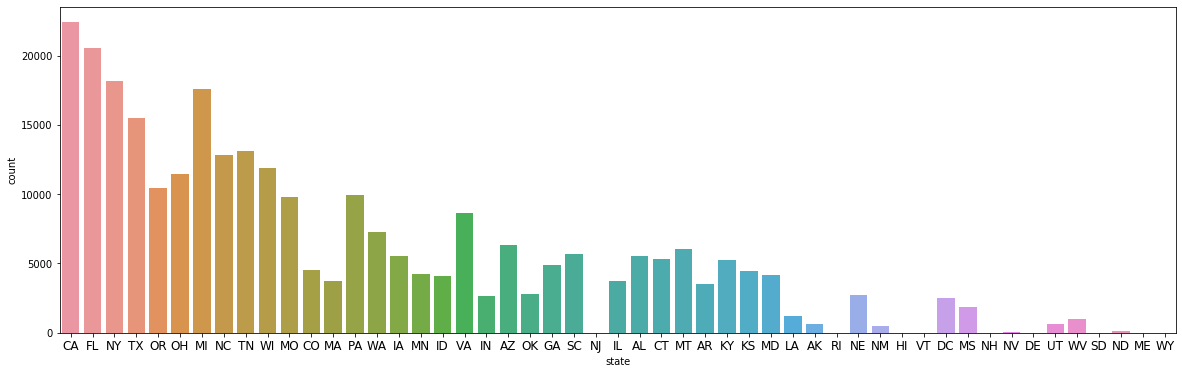

In [97]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='state',data=data,order=data['state_comb'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

[Text(0, 0, 'CA'),
 Text(0, 0, 'FL'),
 Text(0, 0, 'NY'),
 Text(0, 0, 'MI'),
 Text(0, 0, 'TX'),
 Text(0, 0, 'TN'),
 Text(0, 0, 'NC'),
 Text(0, 0, 'WI'),
 Text(0, 0, 'OH'),
 Text(0, 0, 'OR'),
 Text(0, 0, 'PA'),
 Text(0, 0, 'MO'),
 Text(0, 0, 'VA'),
 Text(0, 0, 'WA'),
 Text(0, 0, 'AZ'),
 Text(0, 0, 'MT'),
 Text(0, 0, 'SC'),
 Text(0, 0, 'IA'),
 Text(0, 0, 'AL'),
 Text(0, 0, 'CT'),
 Text(0, 0, 'KY'),
 Text(0, 0, 'GA'),
 Text(0, 0, 'CO'),
 Text(0, 0, 'KS'),
 Text(0, 0, 'MN'),
 Text(0, 0, 'MD'),
 Text(0, 0, 'ID'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'IL'),
 Text(0, 0, 'AR'),
 Text(0, 0, 'OK'),
 Text(0, 0, 'NE'),
 Text(0, 0, 'IN'),
 Text(0, 0, 'DC'),
 Text(0, 0, 'MS'),
 Text(0, 0, 'IA/IL'),
 Text(0, 0, 'LA'),
 Text(0, 0, 'WV'),
 Text(0, 0, 'UT'),
 Text(0, 0, 'AK'),
 Text(0, 0, 'NM'),
 Text(0, 0, 'ND'),
 Text(0, 0, 'NV')]

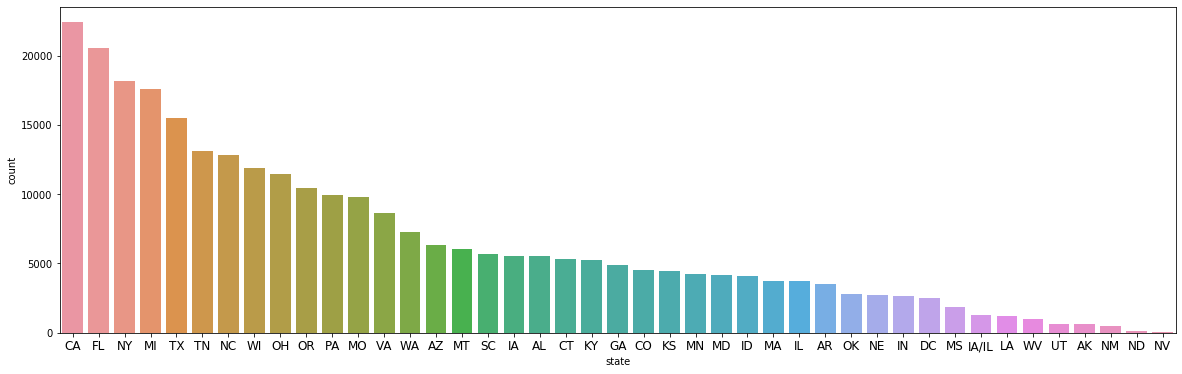

In [98]:
plt.figure(figsize=(20,6))
ax = sns.countplot(x='state',data=data,order=data['state'].value_counts().index);
ax.set_xticklabels(ax.get_xticklabels(), fontsize=12)

In [99]:
data["state"].value_counts()/data["state_comb"].value_counts()

AK       0.175718
AL       0.799246
AR       0.600274
AZ       0.745994
CA       0.492127
CO       0.354287
CT       0.821472
DC       0.988455
DE            NaN
FL       0.704276
GA       0.590816
HI            NaN
IA       0.574314
IA/IL         NaN
ID       0.448882
IL       0.528700
IN       0.309265
KS       0.891482
KY       0.984255
LA       0.278180
MA       0.337268
MD       0.855821
ME            NaN
MI       0.873835
MN       0.441442
MO       0.756861
MS       0.783466
MT       0.980142
NC       0.726229
ND       0.175419
NE       0.843222
NH            NaN
NJ            NaN
NM       0.152914
NV       0.038989
NY       0.659079
OH       0.557736
OK       0.335713
OR       0.486601
PA       0.904101
RI            NaN
SC       0.700380
SD            NaN
TN       0.835505
TX       0.713754
UT       0.407791
VA       0.955247
VT            NaN
WA       0.732474
WI       0.809319
WV       0.705194
WY            NaN
dtype: float64

In [100]:
data.to_csv("clean_with_state_infer.csv",index=False)

## Combine Income data

In [16]:
data=pd.read_csv("clean_with_state_infer.csv")

In [17]:
median_household_income=pd.read_csv("median_household_income2017.csv")

In [18]:
median_household_income=median_household_income.set_index("abbr")

In [19]:
median_household_income.head(10)

,Rank,Geographical Area,Dollar
abbr,,,
DC,1,District of Columbia,82372
MD,2,Maryland,80776
NJ,3,New Jersey,80088
HI,4,Hawaii,77765
MA,5,Massachusetts,77385
CT,6,Connecticut,74168
NH,7,New Hampshire,73381
AK,8,Alaska,73181
CA,9,California,71805


In [20]:
data["income_rank"]=data["state_comb"].apply(lambda x:median_household_income["Rank"].loc[x])

In [21]:
data["median_income"]=data["state_comb"].apply(lambda x:median_household_income["Dollar"].loc[x])

In [22]:
data.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,lat,long,state,predicted_state,state_comb,income_rank,median_income
0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,clean,automatic,rwd,SUV,33.130100,-100.234400,TX,TX,TX,24,59206
1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,clean,automatic,NaN,NaN,30.648368,-97.862949,TX,TX,TX,24,59206
2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.648516,-97.862434,TX,TX,TX,24,59206
3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,clean,automatic,4wd,pickup,32.444400,-99.992400,TX,TX,TX,24,59206
4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,clean,automatic,4wd,pickup,32.781689,-98.942248,TX,TX,TX,24,59206
5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,clean,automatic,4wd,pickup,32.579641,-99.663505,TX,TX,TX,24,59206
6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,clean,automatic,4wd,pickup,32.736030,-97.133644,TX,OK,TX,24,59206
7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,clean,manual,NaN,NaN,30.647777,-97.862434,TX,TX,TX,24,59206
8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,clean,automatic,4wd,pickup,32.754000,-97.134800,TX,OK,TX,24,59206
9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,clean,automatic,4wd,truck,32.736030,-97.133644,TX,OK,TX,24,59206


## Encoding

In [23]:
one_hot_encoding_list=["condition","cylinders","title_status","type","drive"]
label_encoding_list=["transmission","fuel"]


for c1 in one_hot_encoding_list:
    onehot_encoder = OneHotEncoder(sparse=False)
    onehot_encoded = (onehot_encoder.fit_transform(np.array(data[c1].fillna("null")).reshape(len(data[c1]),1))).astype(int)
    onehot_df=pd.DataFrame(onehot_encoded,columns=[c1+"_onehot_"+str(i) for i in range(1,onehot_encoded.shape[1]+1)])
    data=pd.concat([data,onehot_df],axis=1)

for c2 in label_encoding_list:
    label_encoder = LabelEncoder()
    label_encoder.fit(list(data[c2].values))
    data[c2+"_encoded"]=label_encoder.transform(list(data[c2].values))

/Users/zixin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [24]:
data.head(10)

,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,title_status,...,type_onehot_11,type_onehot_12,type_onehot_13,type_onehot_14,drive_onehot_1,drive_onehot_2,drive_onehot_3,drive_onehot_4,transmission_encoded,fuel_encoded
0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,clean,...,0,0,0,0,0,0,0,1,0,2
1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,clean,...,0,0,0,0,0,0,1,0,0,0
2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,clean,...,0,0,0,0,0,0,1,0,1,0
3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,clean,...,0,0,0,0,1,0,0,0,0,2
4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,clean,...,0,0,0,0,1,0,0,0,0,0
5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,clean,...,0,0,0,0,1,0,0,0,0,2
6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,clean,...,0,0,0,0,1,0,0,0,0,2
7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,clean,...,0,0,0,0,0,0,1,0,1,0
8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,clean,...,0,0,0,0,1,0,0,0,0,0
9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,clean,...,0,1,0,0,1,0,0,0,0,2


In [25]:
print(data.columns)

Index(['city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'lat', 'long', 'state', 'predicted_state',
       'state_comb', 'income_rank', 'median_income', 'condition_onehot_1',
       'condition_onehot_2', 'condition_onehot_3', 'condition_onehot_4',
       'condition_onehot_5', 'condition_onehot_6', 'condition_onehot_7',
       'cylinders_onehot_1', 'cylinders_onehot_2', 'cylinders_onehot_3',
       'cylinders_onehot_4', 'cylinders_onehot_5', 'cylinders_onehot_6',
       'cylinders_onehot_7', 'cylinders_onehot_8', 'title_status_onehot_1',
       'title_status_onehot_2', 'title_status_onehot_3',
       'title_status_onehot_4', 'title_status_onehot_5',
       'title_status_onehot_6', 'title_status_onehot_7', 'type_onehot_1',
       'type_onehot_2', 'type_onehot_3', 'type_onehot_4', 'type_onehot_5',
       'type_onehot_6', 'type_onehot_7', 'type_onehot_8', 'type_onehot_9',
       'typ

In [26]:
data.insert(0,"id",data.index)

In [27]:
data.head(10)

,id,city,price,year,manufacturer,make,condition,cylinders,fuel,odometer,...,type_onehot_11,type_onehot_12,type_onehot_13,type_onehot_14,drive_onehot_1,drive_onehot_2,drive_onehot_3,drive_onehot_4,transmission_encoded,fuel_encoded
0,0,"abilene, TX",9000,2009,chevrolet,suburban lt2,good,8,gas,217743.0,...,0,0,0,0,0,0,0,1,0,2
1,1,"abilene, TX",31999,2012,ram,2500,NaN,0,diesel,NaN,...,0,0,0,0,0,0,1,0,0,0
2,2,"abilene, TX",16990,2003,ram,3500,NaN,0,diesel,NaN,...,0,0,0,0,0,0,1,0,1,0
3,3,"abilene, TX",6000,2002,gmc,sierra 1500,good,8,gas,195000.0,...,0,0,0,0,1,0,0,0,0,2
4,4,"abilene, TX",37000,2012,chevrolet,3500,excellent,8,diesel,178000.0,...,0,0,0,0,1,0,0,0,0,0
5,5,"abilene, TX",3700,2003,NaN,F150,fair,8,gas,269000.0,...,0,0,0,0,1,0,0,0,0,2
6,6,"abilene, TX",19950,2013,ford,f-250,NaN,8,gas,116792.0,...,0,0,0,0,1,0,0,0,0,2
7,7,"abilene, TX",19999,2006,ram,2500,NaN,0,diesel,NaN,...,0,0,0,0,0,0,1,0,1,0
8,8,"abilene, TX",33950,2015,ford,f-350,NaN,8,diesel,77350.0,...,0,0,0,0,1,0,0,0,0,0
9,9,"abilene, TX",25950,2015,ford,f-350,NaN,8,gas,121030.0,...,0,1,0,0,1,0,0,0,0,2


In [28]:
data.to_csv("data_encoded.csv",index=False)

## split data sets

In [3]:
data_encoded=pd.read_csv("data_encoded.csv")

In [4]:
len(data_encoded)

467461

In [5]:
index_list=[k for k in range(len(data_encoded))]

In [6]:
OS_index=list(np.random.choice(index_list,round(len(data_encoded)*0.1),replace=False))

In [7]:
IS_index=list(set(index_list).difference(set(OS_index)))

In [8]:
len(IS_index)

420715

In [9]:
data_encoded_IS=data_encoded.iloc[IS_index]

In [10]:
data_encoded_IS.to_csv("data_encoded_IS.csv",index=False)

In [11]:
len(data_encoded_IS)

420715

In [12]:
data_encoded_OS=data_encoded.iloc[OS_index]
data_encoded_OS.to_csv("data_encoded_OS.csv",index=False)

In [13]:
len(data_encoded_OS)

46746

## Grouping Operation

In [71]:
data_IS=pd.read_csv("data_encoded_IS.csv")
data_all_IS=copy.deepcopy(data_IS)
data_OS=pd.read_csv("data_encoded_OS.csv")
data_all_OS=copy.deepcopy(data_OS)

In [72]:
# year
data_all_IS["year_mean_price"]=round(data_all_IS.groupby(['year'])['price'].transform('mean'))
data_all_IS["year_median_price"]=round(data_all_IS.groupby(['year'])['price'].transform('median'))
data_all_IS["year_price_std"]=round(data_all_IS.groupby(['year'])['price'].transform('std'))

data_all_OS=data_all_OS.merge(data_all_IS[["year","year_mean_price","year_median_price","year_price_std"]].drop_duplicates("year"),how="left",on="year")

# manufacturer
data_all_IS["manufacturer_mean_price"]=data_all_IS.groupby(['manufacturer'])['price'].transform('mean')
data_all_IS["manufacturer_median_price"]=data_all_IS.groupby(['manufacturer'])['price'].transform('median')
data_all_IS["manufacturer_price_std"]=data_all_IS.groupby(['manufacturer'])['price'].transform('std')

data_all_OS=data_all_OS.merge(data_all_IS[['manufacturer',"manufacturer_mean_price","manufacturer_median_price","manufacturer_price_std"]].drop_duplicates("manufacturer"),how="left",on="manufacturer")

# condition
data_all_IS["condition_mean_price"]=data_all_IS.groupby(['condition'])['price'].transform('mean')
data_all_IS["condition_median_price"]=data_all_IS.groupby(['condition'])['price'].transform('median')
data_all_IS["condition_price_std"]=data_all_IS.groupby(['condition'])['price'].transform('std')

data_all_OS=data_all_OS.merge(data_all_IS[['condition',"condition_mean_price","condition_median_price","condition_price_std"]].drop_duplicates("condition"),how="left",on="condition")

# cylinders
data_all_IS["cylinders_mean_price"]=data_all_IS.groupby(['cylinders'])['price'].transform('mean')
data_all_IS["cylinders_median_price"]=data_all_IS.groupby(['cylinders'])['price'].transform('median')
data_all_IS["cylinders_price_std"]=data_all_IS.groupby(['cylinders'])['price'].transform('std')

data_all_OS=data_all_OS.merge(data_all_IS[['cylinders',"cylinders_mean_price","cylinders_median_price","cylinders_price_std"]].drop_duplicates("cylinders"),how="left",on="cylinders")

# fuel
data_all_IS["fuel_mean_price"]=data_all_IS.groupby(['fuel'])['price'].transform('mean')
data_all_IS["fuel_median_price"]=data_all_IS.groupby(['fuel'])['price'].transform('median')
data_all_IS["fuel_price_std"]=data_all_IS.groupby(['fuel'])['price'].transform('std')

data_all_OS=data_all_OS.merge(data_all_IS[['fuel',"fuel_mean_price","fuel_median_price","fuel_price_std"]].drop_duplicates("fuel"),how="left",on="fuel")


# title_status
data_all_IS["title_status_mean_price"]=data_all_IS.groupby(['title_status'])['price'].transform('mean')
data_all_IS["title_status_median_price"]=data_all_IS.groupby(['title_status'])['price'].transform('median')
data_all_IS["title_status_price_std"]=data_all_IS.groupby(['title_status'])['price'].transform('std')
data_all_OS=data_all_OS.merge(data_all_IS[['title_status',"title_status_mean_price","title_status_median_price","title_status_price_std"]].drop_duplicates("title_status"),how="left",on="title_status")


# transmission
data_all_IS["transmission_mean_price"]=data_all_IS.groupby(['transmission'])['price'].transform('mean')
data_all_IS["transmission_median_price"]=data_all_IS.groupby(['transmission'])['price'].transform('median')
data_all_IS["transmission_price_std"]=data_all_IS.groupby(['transmission'])['price'].transform('std')
data_all_OS=data_all_OS.merge(data_all_IS[['transmission',"transmission_mean_price","transmission_median_price","transmission_price_std"]].drop_duplicates("transmission"),how="left",on="transmission")


# type
data_all_IS["type_mean_price"]=data_all_IS.groupby(['type'])['price'].transform('mean')
data_all_IS["type_median_price"]=data_all_IS.groupby(['type'])['price'].transform('median')
data_all_IS["type_price_std"]=data_all_IS.groupby(['type'])['price'].transform('std')
data_all_OS=data_all_OS.merge(data_all_IS[['type',"type_mean_price","type_median_price","type_price_std"]].drop_duplicates("type"),how="left",on="type")


In [79]:
# manufacturer, make
data_all_IS["manufacturer_make_mean_price"]=data_all_IS.groupby(['manufacturer',"make"])['price'].transform('mean')
data_all_IS["manufacturer_make_median_price"]=data_all_IS.groupby(['manufacturer','make'])['price'].transform('median')
data_all_IS["manufacturer_make_price_std"]=data_all_IS.groupby(['manufacturer','make'])['price'].transform('std')

data_all_OS=data_all_OS.merge(data_all_IS[['manufacturer',"make","manufacturer_make_mean_price","manufacturer_make_median_price","manufacturer_make_price_std"]].drop_duplicates(['manufacturer',"make"]),how="left",on=['manufacturer',"make"])



In [80]:
print(len(data_all_IS))
print(len(data_all_OS))

420715
46746


In [83]:
print(data_all_IS.columns)

Index(['id', 'city', 'price', 'year', 'manufacturer', 'make', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission',
       'drive', 'type', 'lat', 'long', 'state', 'predicted_state',
       'state_comb', 'income_rank', 'median_income', 'condition_onehot_1',
       'condition_onehot_2', 'condition_onehot_3', 'condition_onehot_4',
       'condition_onehot_5', 'condition_onehot_6', 'condition_onehot_7',
       'cylinders_onehot_1', 'cylinders_onehot_2', 'cylinders_onehot_3',
       'cylinders_onehot_4', 'cylinders_onehot_5', 'cylinders_onehot_6',
       'cylinders_onehot_7', 'cylinders_onehot_8', 'title_status_onehot_1',
       'title_status_onehot_2', 'title_status_onehot_3',
       'title_status_onehot_4', 'title_status_onehot_5',
       'title_status_onehot_6', 'title_status_onehot_7', 'type_onehot_1',
       'type_onehot_2', 'type_onehot_3', 'type_onehot_4', 'type_onehot_5',
       'type_onehot_6', 'type_onehot_7', 'type_onehot_8', 'type_onehot_9',
     

## Reduce Memory Use

In [84]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [85]:
data_all_IS=reduce_mem_usage(data_all_IS)

Mem. usage decreased to 90.68 Mb (68.6% reduction)


In [89]:
data_all_IS.to_csv("data_with_grouping_operations_IS.csv",index=False)

In [90]:
data_all_OS=reduce_mem_usage(data_all_OS)

Mem. usage decreased to 10.43 Mb (67.9% reduction)


In [91]:
data_all_OS.to_csv("data_with_grouping_operations_OS.csv",index=False)

In [92]:
expanded_features_list=['manufacturer_mean_price', 'manufacturer_median_price',
       'manufacturer_price_std', 'condition_mean_price',
       'condition_median_price', 'condition_price_std', 'cylinders_mean_price',
       'cylinders_median_price', 'cylinders_price_std', 'fuel_mean_price',
       'fuel_median_price', 'fuel_price_std', 'title_status_mean_price',
       'title_status_median_price', 'title_status_price_std',
       'transmission_mean_price', 'transmission_median_price',
       'transmission_price_std', 'type_mean_price', 'type_median_price',
       'type_price_std', 'manufacturer_make_mean_price',
       'manufacturer_make_median_price', 'manufacturer_make_price_std']
essential_features_list=["id","price"]

In [93]:
data_expanded_features_IS=data_all_IS[essential_features_list+expanded_features_list]
# data_expanded_features_IS=reduce_mem_usage(data_expanded_features_IS)
data_expanded_features_IS.to_csv("data_expanded_features_only_IS.csv",index=False)

/Users/zixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/zixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/zixin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

Mem. usage decreased to 26.48 Mb (0.0% reduction)


In [94]:
data_expanded_features_OS=data_all_OS[essential_features_list+expanded_features_list]
data_expanded_features_OS.to_csv("data_expanded_features_only_OS.csv",index=False)